**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

In [78]:
# importing the dependencies

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [79]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

In [80]:
type(X_train)

numpy.ndarray

In [81]:
# shape of the numpy array
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 Images

Test Data = 10,000 Images

Image Dimension -> 28*28

Grayscale Image -> 1 channel

In [82]:
# printing the 10th Image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [83]:
print(X_train[10].shape)

(28, 28)


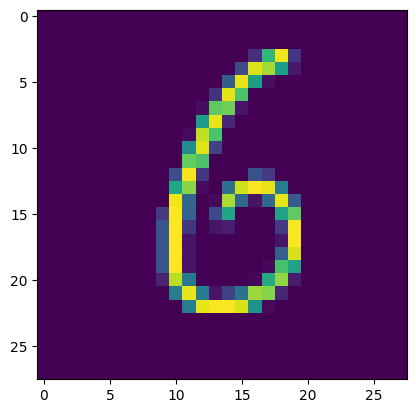

3


In [84]:
# displaying the image

plt.imshow(X_train[18])
plt.show()

# print the corresponding label
print(Y_train[50])

Image Label

In [85]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [86]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_train
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this label as such or we can also applu One Hot Encoding

All the Images must have the same dimensions in this datasets. If not then we have to resize all of them into same common dimension

In [87]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [88]:
# printing the 10th Image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [89]:
# setting up the layer for the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [90]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2973 - accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1398 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0707 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0600 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

Training data accuracy is 98.88%

**Accuracy on Test Data**

In [92]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9738
0.973800003528595


Test data accuracy is 97.54%

In [93]:
print(X_test.shape)

(10000, 28, 28)


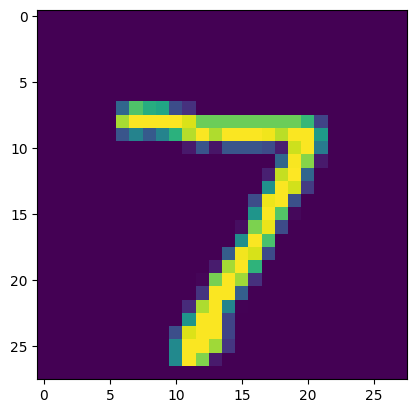

In [94]:
# first data points in X_test
plt.imshow(X_test[0])
plt.show()

In [95]:
print(Y_test[0])

7


In [96]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [97]:
print(Y_pred)

[[7.5172611e-05 8.1288349e-04 4.6538788e-01 ... 9.9999958e-01
  1.3032157e-02 6.7527831e-01]
 [2.6798383e-03 9.8833710e-01 9.9999994e-01 ... 1.1470268e-03
  1.4882638e-02 2.4084710e-07]
 [1.5384861e-03 9.9997139e-01 2.7160457e-01 ... 7.3666722e-01
  3.3493975e-01 5.3388212e-04]
 ...
 [1.6427213e-05 1.9518854e-04 3.4136494e-10 ... 8.1483960e-01
  1.8478802e-01 9.7904903e-01]
 [4.5088300e-04 5.2140575e-05 4.5343998e-07 ... 2.8284913e-01
  9.0943760e-01 1.1449207e-05]
 [1.2942693e-01 3.6397981e-07 9.1917358e-02 ... 9.5303831e-10
  2.7795671e-03 1.6766764e-07]]


In [98]:
print(Y_pred[0])

[7.5172611e-05 8.1288349e-04 4.6538788e-01 9.9640185e-01 4.7283947e-07
 3.1999007e-01 4.7730847e-10 9.9999958e-01 1.3032157e-02 6.7527831e-01]


model.predict() gives the prediction probability of each class for the data point

In [99]:
# converting the prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image )

7


In [100]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [101]:
print(Y_pred)

[[7.5172611e-05 8.1288349e-04 4.6538788e-01 ... 9.9999958e-01
  1.3032157e-02 6.7527831e-01]
 [2.6798383e-03 9.8833710e-01 9.9999994e-01 ... 1.1470268e-03
  1.4882638e-02 2.4084710e-07]
 [1.5384861e-03 9.9997139e-01 2.7160457e-01 ... 7.3666722e-01
  3.3493975e-01 5.3388212e-04]
 ...
 [1.6427213e-05 1.9518854e-04 3.4136494e-10 ... 8.1483960e-01
  1.8478802e-01 9.7904903e-01]
 [4.5088300e-04 5.2140575e-05 4.5343998e-07 ... 2.8284913e-01
  9.0943760e-01 1.1449207e-05]
 [1.2942693e-01 3.6397981e-07 9.1917358e-02 ... 9.5303831e-10
  2.7795671e-03 1.6766764e-07]]


Y_test -> True labels

Y_pred_labels -> Predicted Labels

**Confusion Matrix**

In [102]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [103]:
print(conf_mat)

tf.Tensor(
[[ 964    0    0    2    2    3    5    1    2    1]
 [   1 1125    3    0    0    2    1    0    3    0]
 [   1    2 1007    4    3    3    2    7    2    1]
 [   1    0    4  969    1   18    0    6    3    8]
 [   1    0    5    1  959    1    3    3    2    7]
 [   3    0    0    4    2  875    3    1    2    2]
 [   6    2    3    1    4    9  932    0    1    0]
 [   0    4    8    5    1    0    0 1004    1    5]
 [   2    0    4    6    5    9    1    4  936    7]
 [   2    3    0    7   12    5    1    8    3  968]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

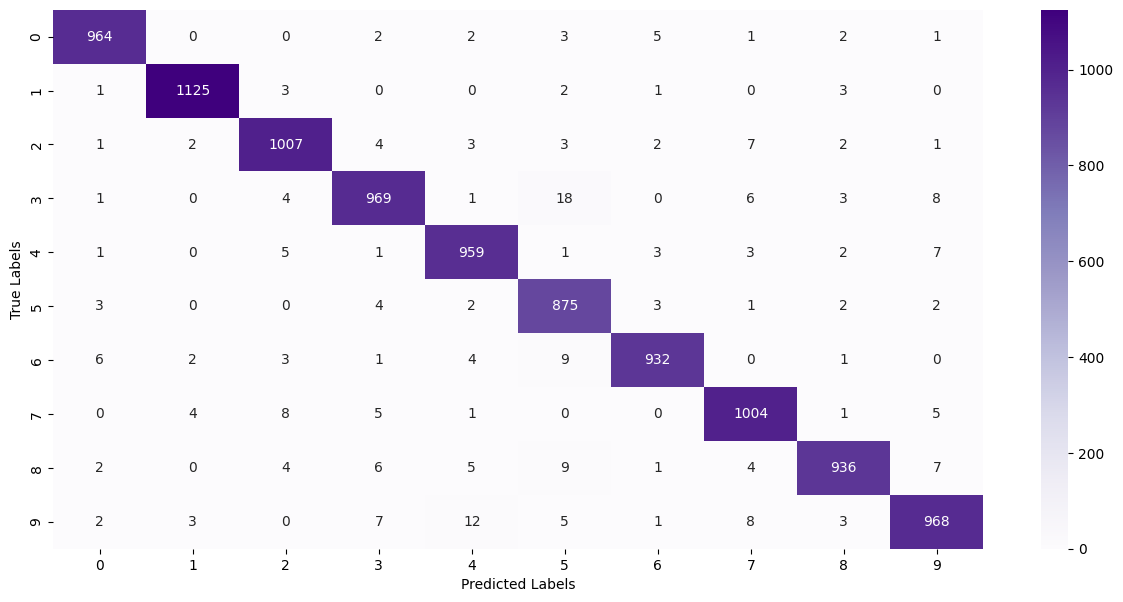

In [104]:
#creating the Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Purples')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building the Predictive System**

In [120]:
input_image_path = '/content/7.sample_image.png'

input_image = cv2.imread(input_image_path)

In [121]:
type(input_image)

numpy.ndarray

In [122]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


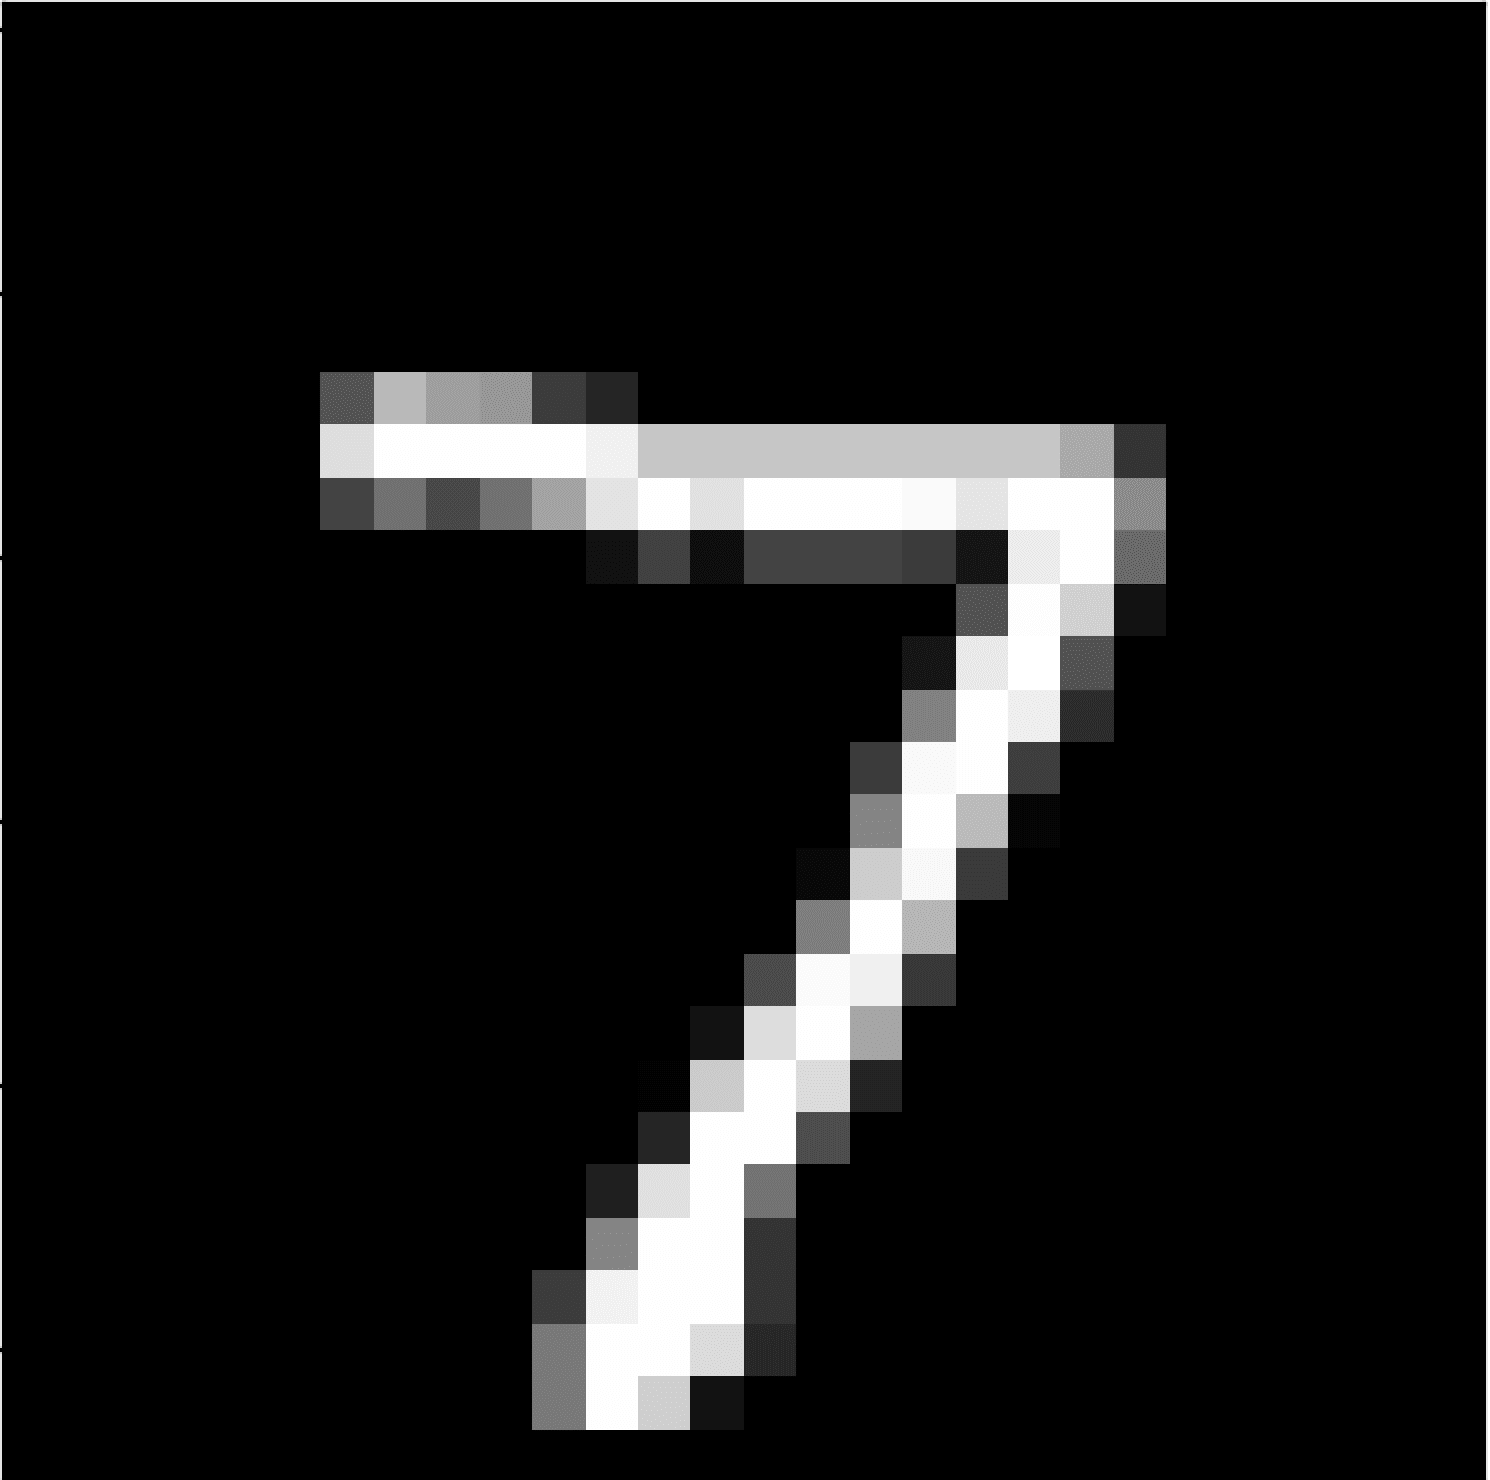

In [123]:
cv2_imshow(input_image)

In [124]:
input_image.shape

(1480, 1490, 3)

In [125]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [126]:
grayscale.shape

(1480, 1490)

In [127]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [128]:
input_image_resize.shape

(28, 28)

In [129]:
cv2_imshow(input_image_resize)

In [130]:
input_image_resize = input_image_resize/255

In [131]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [132]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[7.2192561e-05 8.0553425e-04 4.7596726e-01 9.9646050e-01 4.9108672e-07
  3.3723667e-01 4.7967497e-10 9.9999958e-01 1.3164750e-02 6.6872525e-01]]


In [133]:
input_pred_label = np.argmax(input_prediction)

In [134]:
print(input_pred_label)

7


### **Predictive System**

Path of the Image to be Predicted: /content/3_images.png


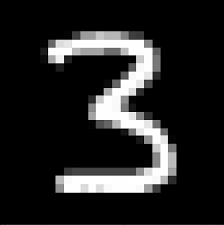

1/1 [==============================] - 0s 23ms/step
The Handwritten Digit is Recognised as: 3


In [140]:
input_image_path = input('Path of the Image to be Predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is Recognised as:',input_pred_label)

Therefore, This is How we do digit Classification

      Hasrat Ali
      Tahnk You:)